In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy/no_preprocessing')
path_lm = Path('/home/ubuntu/data/medical')

batch_size=32
drop_mult=0.1
learning_rate=1e-4
wd=1e-7
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-valid.csv', classes=['Suicide','Homicide'], bs=batch_size)

In [6]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained_grad_no_preprocessing')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


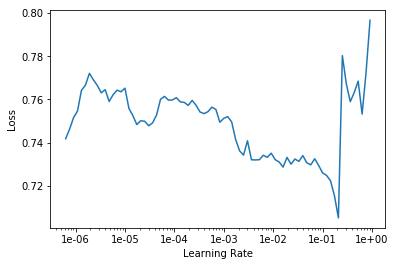

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:45
epoch  train_loss  valid_loss  accuracy
1      0.744738    0.675677    0.609442  (00:10)
2      0.698023    0.840241    0.420601  (00:12)
3      0.683294    0.782253    0.510730  (00:10)
4      0.666186    0.782765    0.420601  (00:11)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 09:35
epoch  train_loss  valid_loss  accuracy
1      0.645090    0.845152    0.420601  (00:30)
2      0.634188    0.535198    0.772532  (00:30)
3      0.608539    0.646983    0.648069  (00:30)
4      0.602838    0.604522    0.678112  (00:27)
5      0.583335    0.581570    0.699571  (00:27)
6      0.570333    0.587738    0.712446  (00:26)
7      0.549992    0.662202    0.656652  (00:29)
8      0.525925    0.591250    0.712446  (00:29)
9      0.501684    0.711930    0.639485  (00:31)
10     0.481247    0.619756    0.673820  (00:27)
11     0.492449    0.666076    0.665236  (00:26)
12     0.462171    0.499721    0.781116  (00:29)
13     0.455616    0.572690    0.725322  (00:27)
14     0.468647    0.485590    0.806867  (00:25)
15     0.459304    0.452600    0.806867  (00:25)
16     0.421117    0.604549    0.712446  (00:30)
17     0.410146    0.530548    0.772532  (00:29)
18     0.380740    0.458726    0.798283  (00:33)
19     0.415050    0.466912    0.802575  (00:25)
20     0.39

In [11]:
learn.validate()

[0.42021906, tensor(0.8369)]

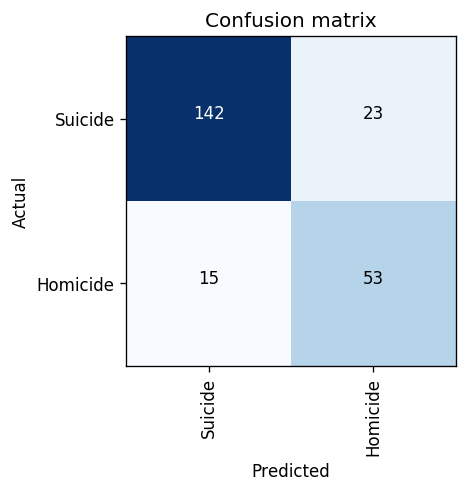

In [12]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

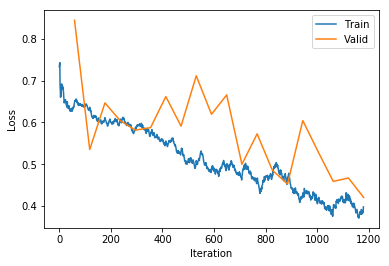

In [13]:
learn.recorder.plot_losses()

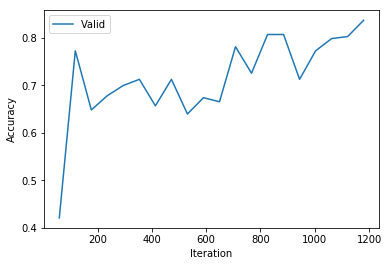

In [14]:
learn.recorder.plot_metrics()

In [15]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained_grad_no_preprocessing')

learn.freeze()

In [16]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


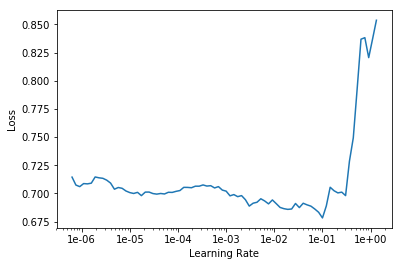

In [17]:
learn.recorder.plot()

In [18]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:46
epoch  train_loss  valid_loss  accuracy
1      0.676365    0.647397    0.678112  (00:13)
2      0.671352    0.741526    0.472103  (00:11)
3      0.663082    0.736072    0.489270  (00:11)
4      0.638798    0.759829    0.459227  (00:11)



In [19]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 09:27
epoch  train_loss  valid_loss  accuracy
1      0.634809    0.711476    0.570815  (00:25)
2      0.599402    0.654251    0.609442  (00:32)
3      0.608364    0.555185    0.763949  (00:25)
4      0.598382    0.560617    0.721030  (00:26)
5      0.585544    0.565349    0.725322  (00:25)
6      0.540556    0.645573    0.643777  (00:30)
7      0.535039    0.539753    0.746781  (00:26)
8      0.536450    0.559653    0.729614  (00:26)
9      0.510478    0.669740    0.613734  (00:30)
10     0.515873    0.514745    0.772532  (00:27)
11     0.508203    0.482084    0.815451  (00:25)
12     0.498619    0.483386    0.811159  (00:25)
13     0.438567    0.540040    0.712446  (00:31)
14     0.439839    0.456286    0.806867  (00:31)
15     0.450495    0.390941    0.819743  (00:24)
16     0.429244    0.369052    0.836910  (00:30)
17     0.445590    0.391805    0.836910  (00:25)
18     0.414922    0.421870    0.815451  (00:30)
19     0.379971    0.381408    0.836910  (00:32)
20     0.37

In [20]:
learn.validate()

[0.43717927, tensor(0.8112)]

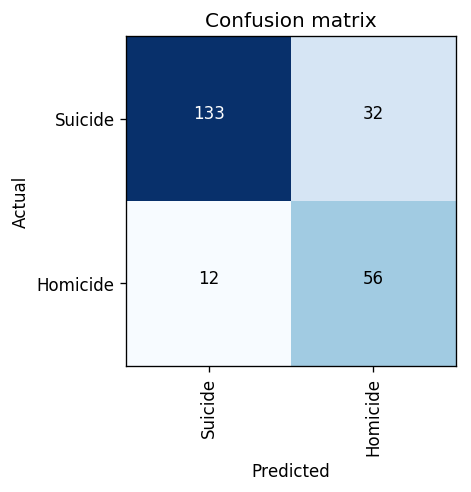

In [21]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

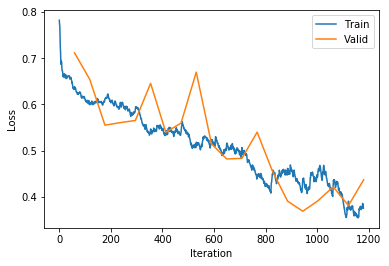

In [22]:
learn.recorder.plot_losses()

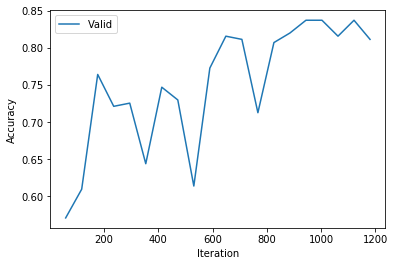

In [23]:
learn.recorder.plot_metrics()

In [24]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained_grad_no_preprocessing')

learn.freeze()

In [25]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


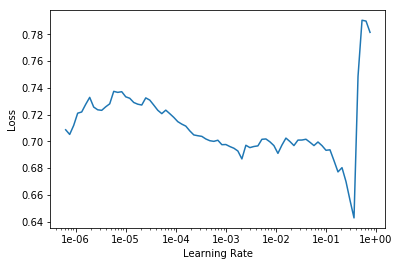

In [26]:
learn.recorder.plot()

In [27]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:46
epoch  train_loss  valid_loss  accuracy
1      0.678773    0.589312    0.785408  (00:10)
2      0.632779    0.640010    0.626609  (00:12)
3      0.644118    0.580386    0.742489  (00:10)
4      0.614959    0.661037    0.622318  (00:11)



In [28]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

epoch,train_loss,valid_loss,accuracy
1,0.626642,0.651774,0.609442


RuntimeError: CUDA error: out of memory

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained_grad_no_preprocessing')

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained_grad_no_preprocessing')


learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
print(accuracy_list)

In [ ]:
print(sum(accuracy_list)/len(accuracy_list))

In [ ]:
#We are now done doing 5-fold cross validation 

In [ ]:
#Now train with all the training data and evaluate with the test data

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained_grad_no_preprocessing')

learn.freeze()


In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
import torch

torch.cuda.empty_cache()